In [1]:
library("devtools")

library("NetHypGeom")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: ggplot2


In [18]:
net <- ps_model(N = 500, avg.k = 10, gma = 2.0, Temp = 0.01)

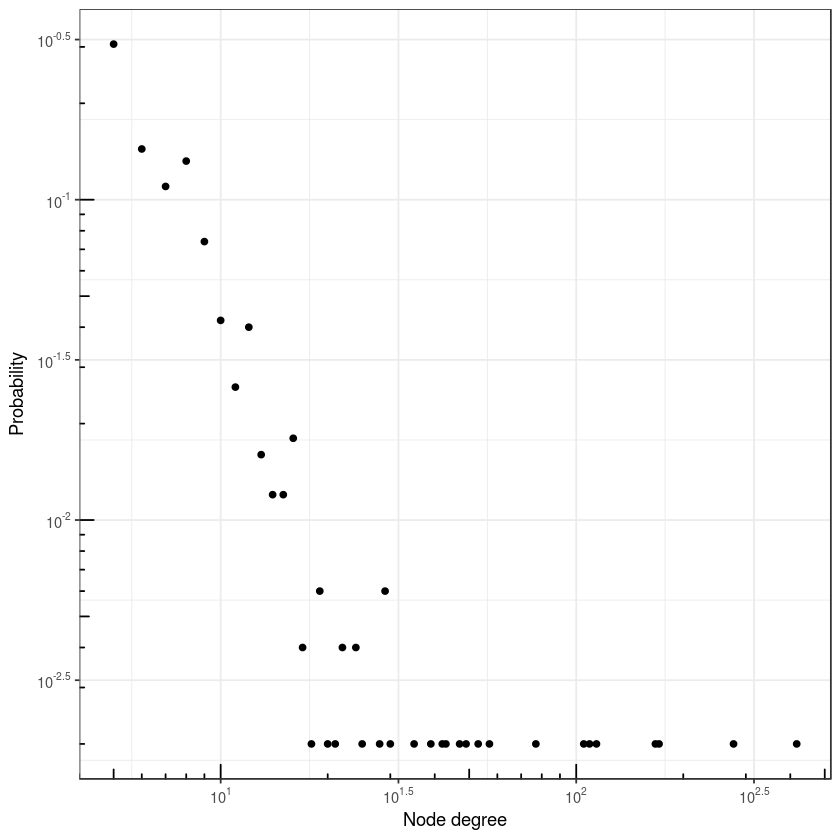

In [19]:
plot_degree_distr(net$network)

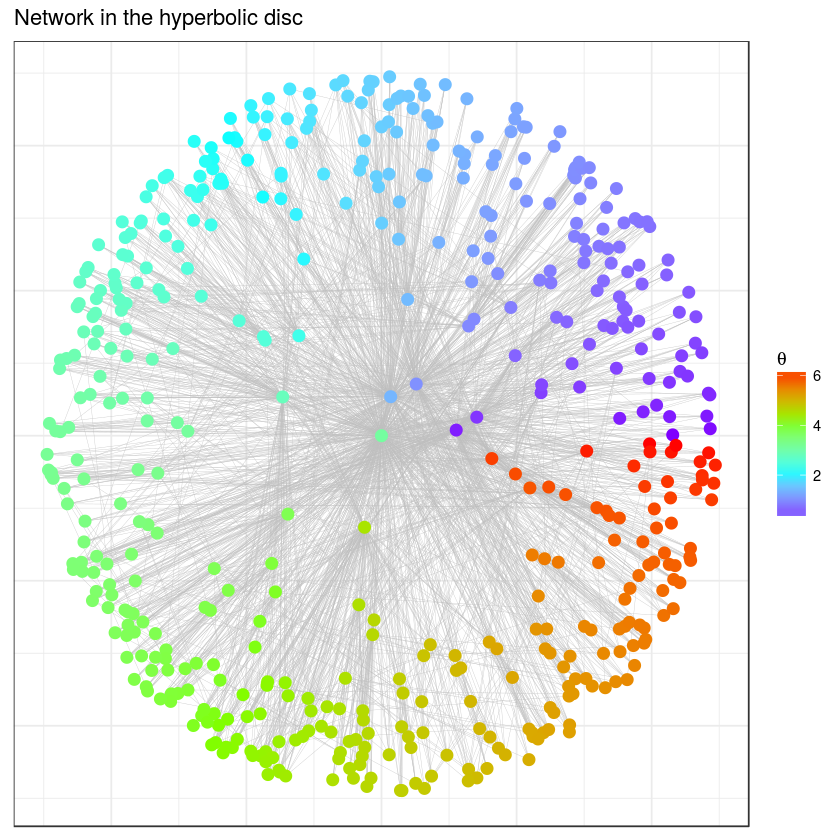

In [20]:
plot_hyperbolic_net(network = net$network, nodes = net$polar, node.colour = net$polar$theta)

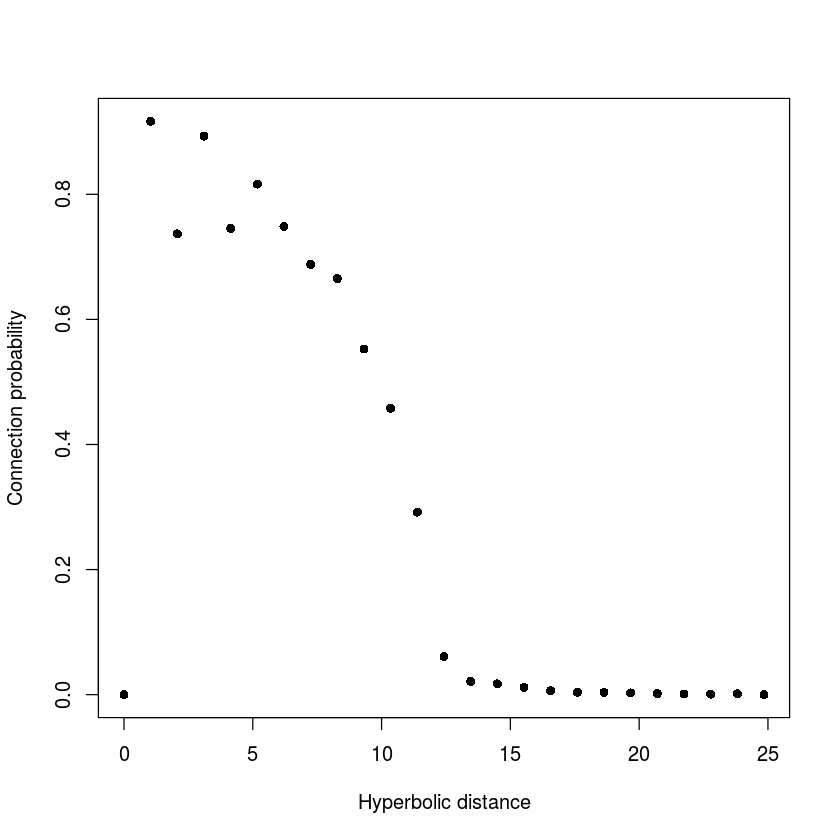

In [21]:
conn <- get_conn_probs(net = net$network, polar = net$polar, bins = 25)
plot(conn$dist, conn$prob, pch = 16, xlab = "Hyperbolic distance", ylab = "Connection probability")

In [22]:
fit_power_law(degree(net$network))$alpha

[1] 2.799399

In [23]:
# Form vectors of random non-redundant source-target pairs
N <- vcount(net$network)
st <- 1000

# We subtract 1, because the formulae to go from linear upper 
# diagonal indexing to (i,j) are zero-based
k <- sample(N*(N-1)/2, st) - 1
sources <- (N - 2 - floor(sqrt(-8*k + 4*N*(N-1)-7)/2.0 - 0.5))
targets <- (k + sources + 1 - N*(N-1)/2 + (N-sources)*((N-sources)-1)/2)

# Back to 1-based indexing
sources <- sources + 1
targets <- targets + 1

# Analyse the network's navigability
hop.stretch <- greedy_route_packets(net$network, net$polar, sources, targets)

# Compute the fraction of succesfully delivered packets
sum(hop.stretch > 0)/st

[1] 0.976

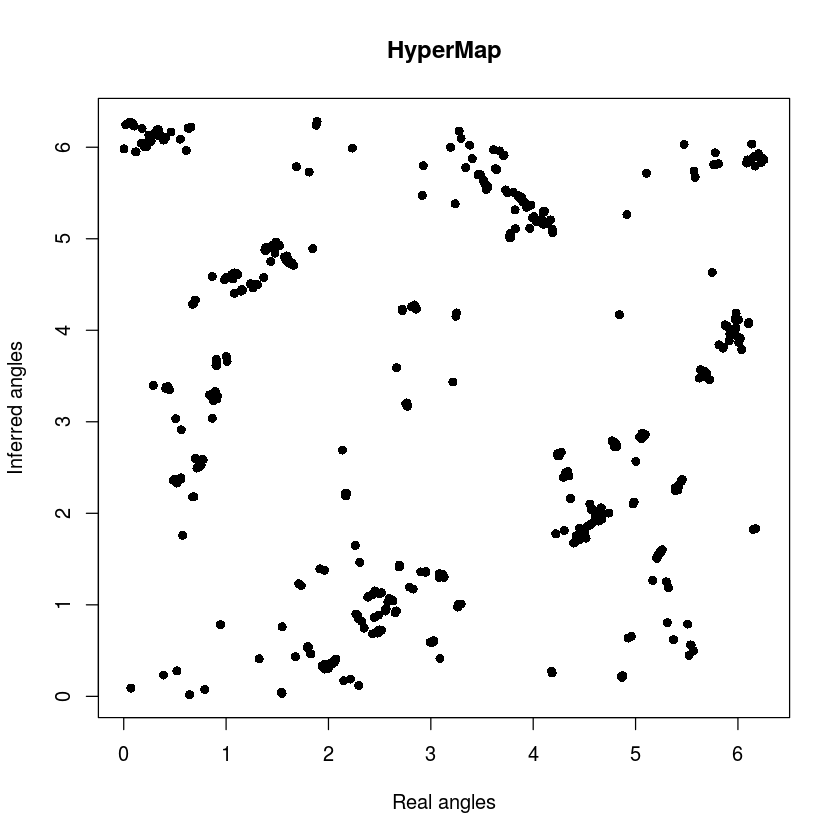

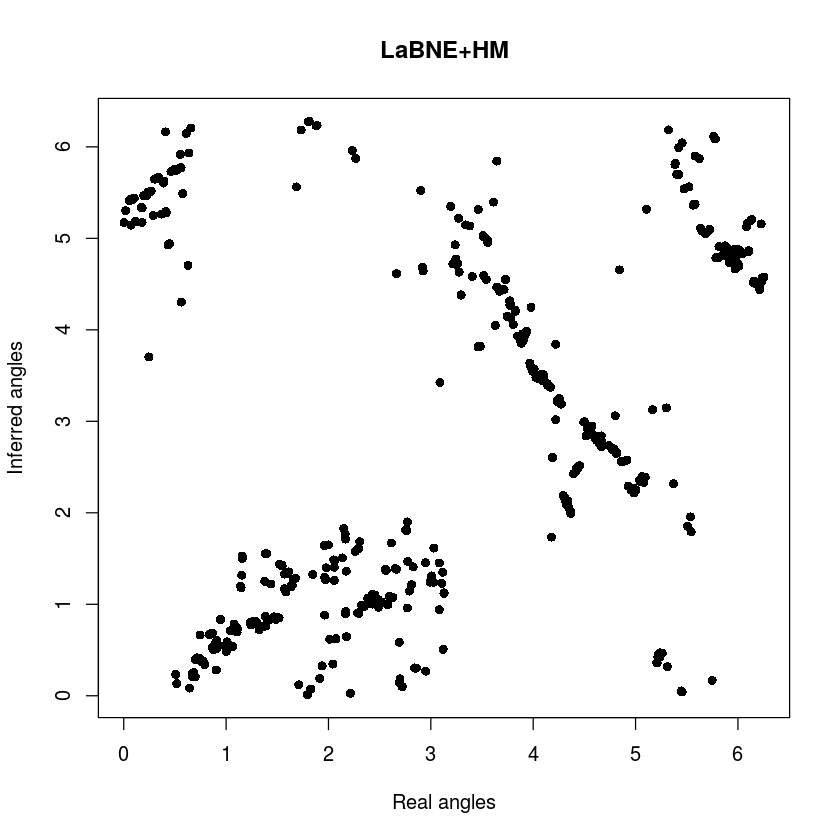

In [24]:
# To embed the network using HyperMap, we set LaBNE+HM's window to 2*pi
hm <- labne_hm(net = net$network, Temp = 0.15, k.speedup = 10, w = 2*pi)

# To embed with LaBNE+HM, we reduce HyperMap's search space from 2*pi 
# to a small window of 15 degrees around LaBNE's angles
lh <- labne_hm(net = net$network, Temp = 0.15, k.speedup = 10, w = pi/12)

# Comparison between real and HyperMap-inferred angles and real and LaBNE+HM-inferred angles
plot(net$polar$theta, hm$polar$theta, pch = 16, 
     xlab = "Real angles", ylab = "Inferred angles", main = "HyperMap")
plot(net$polar$theta, lh$polar$theta, pch = 16, 
     xlab = "Real angles", ylab = "Inferred angles", main = "LaBNE+HM")

In [28]:
lh$polar$theta

[1] 3.42382042 0.72146324 0.83432221 5.14377978 2.83878540 5.17431136
  [7] 1.14510062 5.16253713 4.05856870 0.89998603 0.75434113 0.52902395
 [13] 4.86279821 0.68533573 0.96799882 1.05199730 0.23385568 4.87744461
 [19] 2.85860999 3.63493356 3.70375484 5.24875148 0.58981975 2.77519718
 [25] 4.87571297 0.66383964 1.01141110 3.51384417 0.61824894 0.86032925
 [31] 2.84030065 5.08201860 0.81111603 0.55115440 4.73165204 0.50730111
 [37] 0.74050097 0.55253320 1.16945838 5.07108752 2.24697467 5.64932374
 [43] 5.46583971 0.94075550 4.43796191 4.30317855 4.12846535 2.57454268
 [49] 3.95592779 3.43926412 5.06795812 5.74413245 0.40716283 0.71110755
 [55] 5.56212360 2.37229927 0.84111918 6.18412675 0.45668359 0.20824472
 [61] 1.02711023 0.88151102 1.89984632 5.60449126 4.83914339 4.38203070
 [67] 2.69255694 0.39062500 2.89091808 0.46900425 2.39496868 2.34226312
 [73] 1.13619892 0.78466398 0.69680851 3.39405170 1.45161290 4.68490511
 [79] 3.88141405 1.24164774 5.99199262 3.87931159 5.42197730 4.75964082
 [85] 0.30386471 3.06000531 1.33802817 5.01301529 1.64878049 5.51152520
 [91] 1.42962963 6.04381210 4.92898564 5.21810891 0.76167605 0.82918238
 [97] 4.78901742 3.81877227 1.27623153 1.04908346 2.13505210 4.66392443
[103] 6.27392327 2.55884155 6.16388008 1.47967480 4.88630134 1.08173313
[109] 0.77418170 4.50458264 5.77149978 3.81527313 2.48308200 3.20938337
[115] 1.20651800 2.78617240 5.69855972 2.91316541 2.99642332 0.24714829
[121] 3.24906050 2.06737111 0.90588552 0.42667308 1.08464236 1.30978261
[127] 1.64660421 0.54700536 5.42197036 2.35838056 5.69848758 5.28173373
[133] 1.64238411 5.48938047 0.30158730 2.76621252 2.50815745 5.62420504
[139] 0.80329636 0.39348371 4.85353648 0.38485804 4.57647737 5.13515514
[145] 5.15788460 1.00260473 5.36228736 5.72916005 0.71531453 5.74370545
[151] 4.94195863 3.46744789 2.70024266 5.64681432 0.40571429 5.46780154
[157] 4.95431859 1.61443306 0.60298305 0.95944489 0.79633441 0.98762139
[163] 1.18872491 1.55223881 1.52666667 0.81662675 5.43992774 5.37194389
[169] 2.99055635 2.76584012 0.34006734 2.60633678 5.62500649 0.04098361
[175] 3.51349158 4.74493776 2.55997332 0.21518987 6.14600092 2.92005632
[181] 5.84400416 4.83036860 3.55267410 2.64898918 5.69741749 1.38095238
[187] 0.30100334 1.66987491 0.85268491 0.58546732 0.89760854 2.79179829
[193] 2.51567876 1.50073075 1.11032452 0.09848485 6.20590101 0.64683401
[199] 3.18729158 6.11436842 2.84394917 1.45370370 5.09747470 6.23399822
[205] 1.32965245 1.76635514 4.76034197 4.90962741 5.42325891 1.57803841
[211] 5.20489497 1.48543689 5.77364774 2.34423916 4.52322037 5.95907633
[217] 2.75310413 2.49129302 5.17143424 0.14492754 4.20059811 2.66040370
[223] 5.33511820 1.41851354 3.59204126 5.66238235 4.81098988 0.41481481
[229] 3.85992844 1.30573248 3.23233131 0.80619233 4.57372986 5.12515801
[235] 4.31673455 0.53792380 1.55277597 5.93313032 0.07407407 2.45912152
[241] 5.75321001 4.91855438 0.67025090 1.06666413 2.73576540 0.86796159
[247] 5.87237268 2.94590588 5.69719114 5.11142987 4.54992552 1.38333333
[253] 2.75293485 5.82019396 4.98337550 3.89473303 0.30188679 1.21442756
[259] 4.63078677 1.71238938 1.79273751 2.33011711 4.69555635 5.07681779
[265] 6.27878915 0.82637411 1.38874298 4.43982175 0.02702703 5.91667133
[271] 5.06306457 2.01522619 1.23991008 4.73749758 4.44088481 1.29509927
[277] 2.94311929 1.37017327 3.14586142 5.46554184 2.29197470 0.05263158
[283] 4.72132985 5.39624138 3.98424107 2.60355745 3.47772337 3.85834035
[289] 5.01250460 0.86332965 2.31697338 1.07544300 4.58262729 2.82996720
[295] 5.80522714 4.27966205 4.46672125 1.81297503 1.82854426 3.40981786
[301] 1.42970283 0.56648411 4.14408633 1.37128581 1.46750342 5.50552024
[307] 0.52650177 0.37172142 6.23044770 1.40484275 3.14708888 1.36174431
[313] 0.36054422 3.43878805 1.20331356 5.33531701 0.01379310 1.19589793
[319] 2.80972031 4.89436567 0.14893617 5.89890430 1.10129022 0.10043668
[325] 1.09401407 5.05218950 1.35014701 1.40969163 0.25265957 1.03595824
[331] 5.31437617 2.38948626 0.28167294 1.2

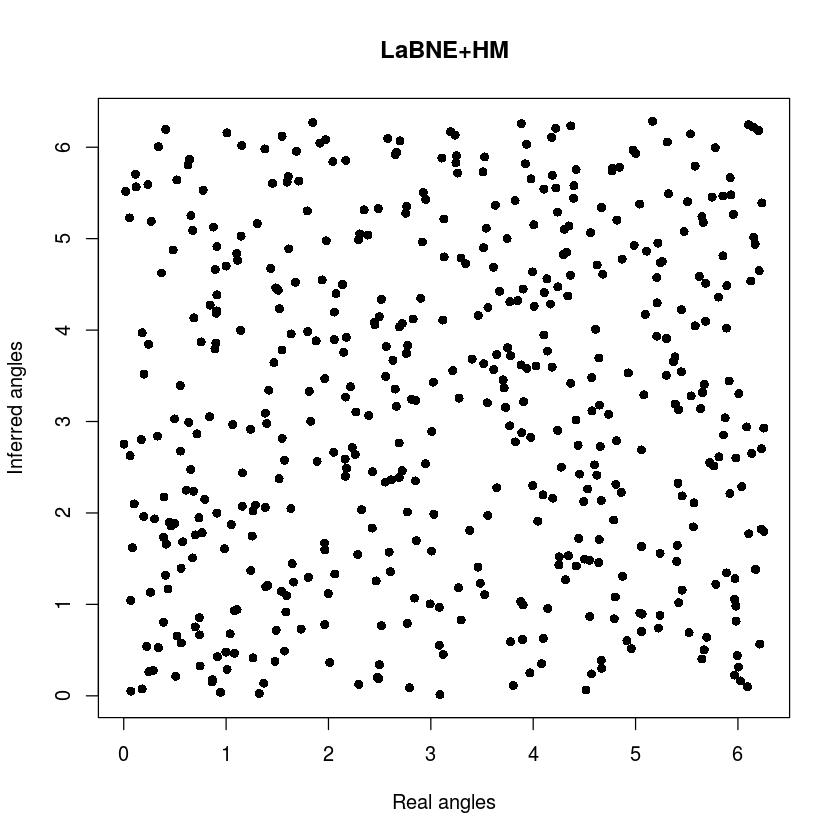

In [27]:
plot(net$polar$theta, sapply(1:500, function(i) 2 * pi * i / 500), pch = 16, 
     xlab = "Real angles", ylab = "Inferred angles", main = "LaBNE+HM")

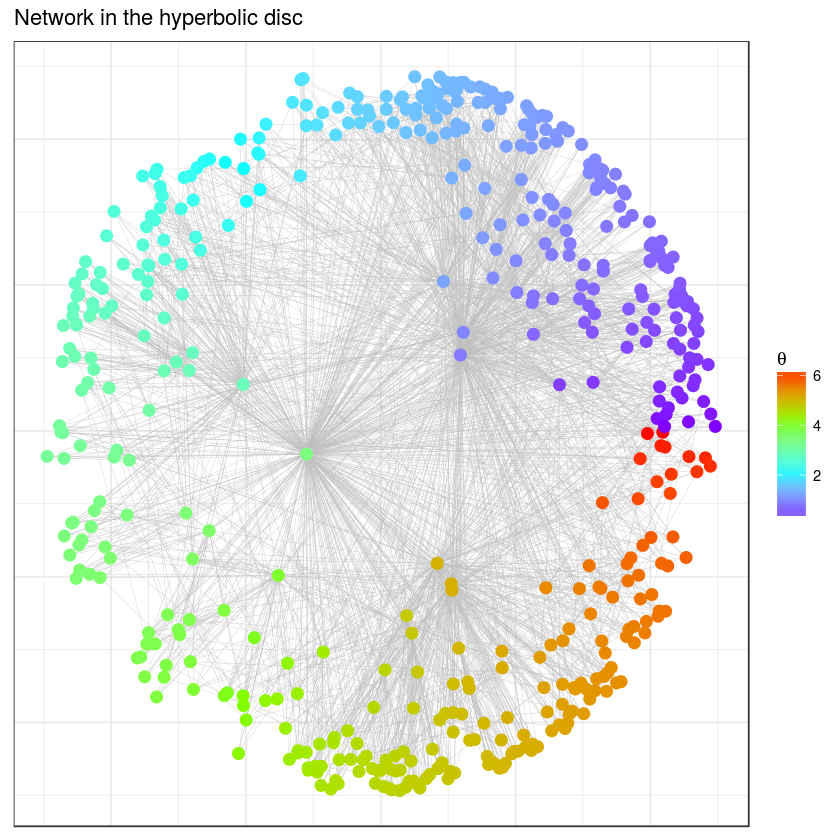

In [26]:
plot_hyperbolic_net(network = lh$network, nodes = lh$polar, node.colour = lh$polar$theta)

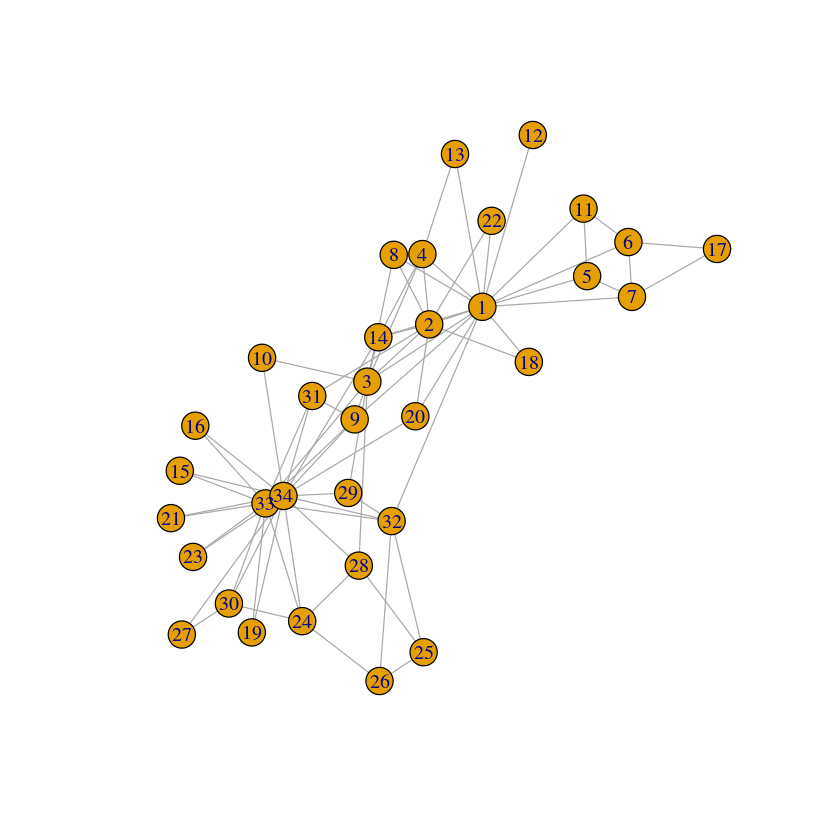

In [15]:
zach <- graph("Zachary") # the Zachary karate club

plot(zach, vertex.size=10)

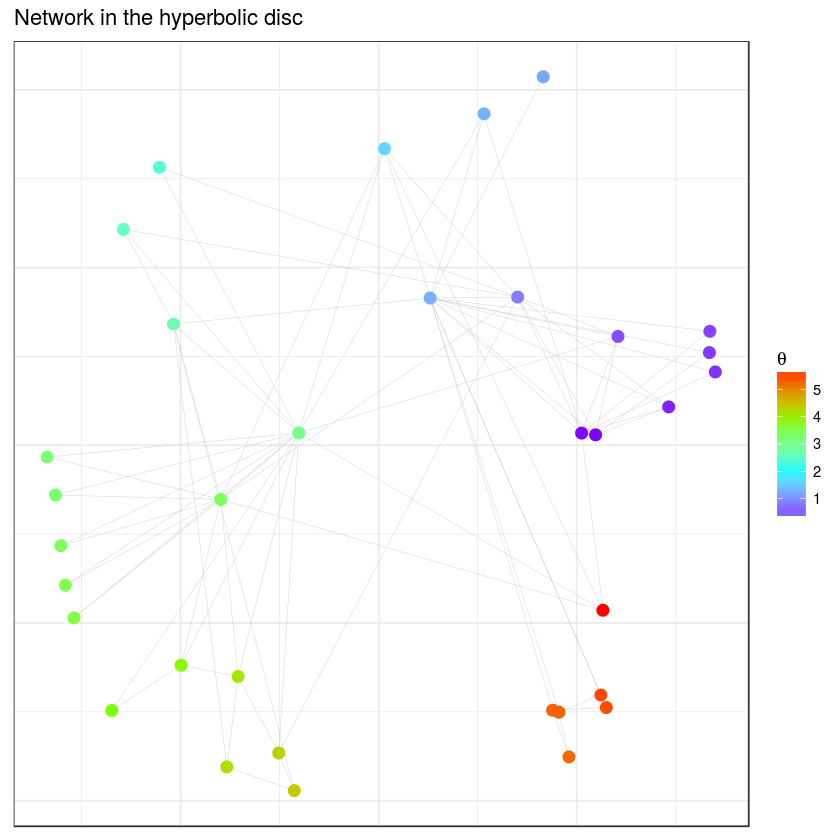

In [16]:
lh_zachary <- labne_hm(net = zach, gma = 2.3, Temp = 0.15, k.speedup = 10, w = pi/12)

plot_hyperbolic_net(network = lh_zachary$network, nodes = lh_zachary$polar, node.colour = lh_zachary$polar$theta)

In [47]:
lh_zachary

$network
IGRAPH U--- 34 78 -- Zachary
+ attr: name (g/c)
+ edges:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--11  1--12
[11]  1--13  1--14  1--18  1--20  1--22  1--32  2-- 3  2-- 4  2-- 8  2--14
[21]  2--18  2--20  2--22  2--31  3-- 4  3-- 8  3--28  3--29  3--33  3--10
[31]  3-- 9  3--14  4-- 8  4--13  4--14  5-- 7  5--11  6-- 7  6--11  6--17
[41]  7--17  9--31  9--33  9--34 10--34 14--34 15--33 15--34 16--33 16--34
[51] 19--33 19--34 20--34 21--33 21--34 23--33 23--34 24--26 24--28 24--33
[61] 24--34 24--30 25--26 25--28 25--32 26--32 27--30 27--34 28--34 29--32
[71] 29--34 30--33 30--34 31--33 31--34 32--33 32--34 33--34

$polar
   id        r     theta
1   1 2.693931 1.1745260
2   2 4.103609 0.0500000
3   3 3.760312 0.7277466
4   4 4.384104 0.0400000
5   5 6.157457 5.5288413
6   6 5.687639 5.3780336
7   7 5.793782 5.3919784
8   8 5.893072 0.1100000
9   9 5.007897 1.5469797
10 10 6.451388 2.3272284
11 11 6.383001 5.5165868
12 12 7.052721 1.0800000
13 13 6.860162 

In [17]:
polar <- lh_zachary$polar

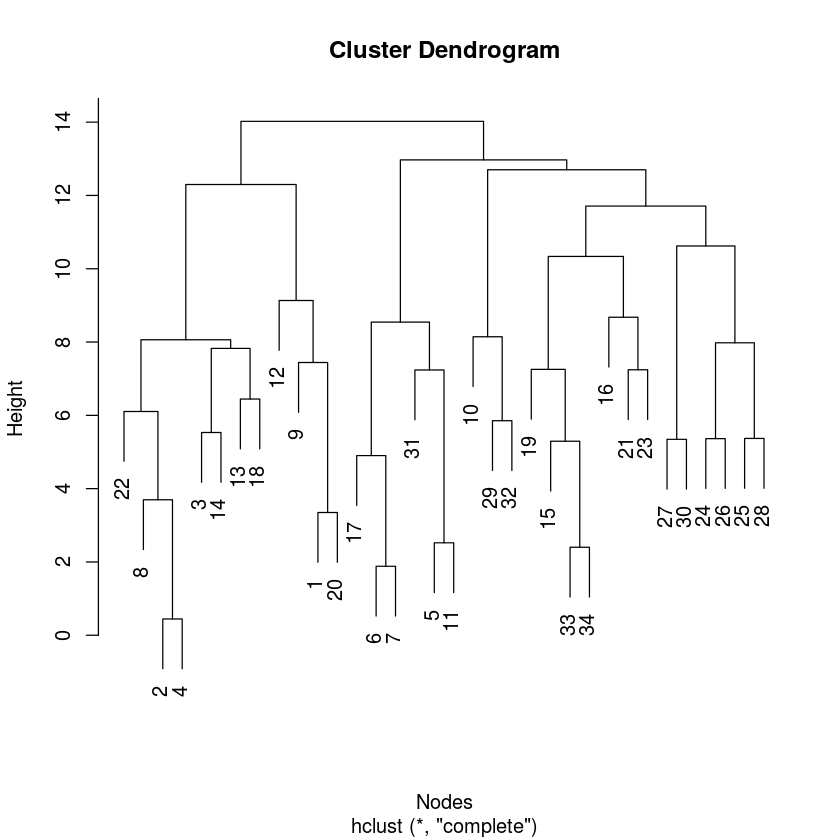

In [18]:
distances <- sapply(1:nrow(polar), function(i) {
    sapply(1:nrow(polar), function(j) {
        hyperbolic_dist(polar[i,], polar[j,])
    })
})

clusters <- hclust(as.dist(distances))
plot(clusters, xlab = "Nodes")

In [19]:
cutree(clusters, k = c(2))

[1] 1 1 1 1 2 2 2 1 1 2 2 1 1 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2

In [22]:
kmea <- kmeans(as.dist(distances), 2)

In [24]:
kmea$cluster

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  1  1  1  1  1  1  2  1  1  1  1  2  2  1  1  2  1  2  1  2  2  2  2 
27 28 29 30 31 32 33 34 
 2  2  2  2  1  2  2  2

In [44]:
actual_assignments <- data.frame(1:34, c(1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2))

In [45]:
pred_assignments <- data.frame(1:34, kmea$cluster)

In [46]:
library(NMI)

In [47]:
NMI(actual_assignments, pred_assignments)

$value
[1] 0.8371695

In [50]:
shortest_paths <- distances(zach)

In [51]:
mst <- minimum.spanning.tree(zach)

In [53]:
mst_shortest_paths <- distances(zach)

In [57]:
shortest_paths

0,1,1,1,1,1,1,1,1,2,⋯,2,2,3,2,2,3,2,1,2,2
1,0,1,1,2,2,2,1,2,2,⋯,3,3,3,2,2,3,1,2,2,2
1,1,0,1,2,2,2,1,1,1,⋯,2,3,3,1,1,2,2,2,1,2
1,1,1,0,2,2,2,1,2,2,⋯,3,3,3,2,2,3,2,2,2,2
1,2,2,2,0,2,1,2,2,3,⋯,3,3,4,3,3,4,3,2,3,3
1,2,2,2,2,0,1,2,2,3,⋯,3,3,4,3,3,4,3,2,3,3
1,2,2,2,1,1,0,2,2,3,⋯,3,3,4,3,3,4,3,2,3,3
1,1,1,1,2,2,2,0,2,2,⋯,3,3,4,2,2,3,2,2,2,3
1,2,1,2,2,2,2,2,0,2,⋯,3,3,2,2,2,2,1,2,1,1
2,2,1,2,3,3,3,2,2,0,⋯,3,3,2,2,2,2,2,2,2,1
1,2,2,2,1,1,2,2,2,3,⋯,3,3,4,3,3,4,3,2,3,3


In [60]:
all(mst_shortest_paths == shortest_paths)

[1] TRUE

In [63]:
dd <- read.table("reactome_edgelist.txt")
gg <- graph.data.frame(dd, directed=FALSE)

In [64]:
gg_mst <- minimum.spanning.tree(gg)
dist <- distances(gg)
gg_mst_dist <- distances(gg_mst)

In [65]:
all(dist == gg_mst_dist)

[1] FALSE